<a href="https://colab.research.google.com/github/Sopralapanca/CommonLitChallenge/blob/main/RegressionBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/Sopralapanca/CommonLitChallenge.git"

Cloning into 'CommonLitChallenge'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 1), reused 10 (delta 0), pack-reused 0
Receiving objects: 100% (22/22), 1.03 MiB | 12.73 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import pandas as pd
summaries_train_path = "/content/CommonLitChallenge/data/summaries_train.csv"
prompt_train_path = "/content/CommonLitChallenge/data/prompts_train.csv"

summaries_test_path = "/content/CommonLitChallenge/data/summaries_test.csv"
prompt_test_path = "/content/CommonLitChallenge/data/prompts_test.csv"

train_data = pd.read_csv(summaries_train_path, sep=',', index_col=0)
prompt_data = pd.read_csv(prompt_train_path, sep=',', index_col=0)


In [ ]:
len(train_data)

7165

In [ ]:
len(prompt_data)

4

In [ ]:
train_data.head()

,prompt_id,text,content,wording
student_id,,,,
000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [ ]:
prompt_data.head()

,prompt_question,prompt_title,prompt_text
prompt_id,,,
39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \nAs the sequel to what has already...
3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \nThe Third Wave experiment took pl...
ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [ ]:
all_strings = train_data["text"].tolist() + prompt_data["prompt_question"].tolist() + prompt_data["prompt_title"].tolist() + prompt_data["prompt_text"].tolist()
len(all_strings)

7177

In [ ]:
training_data = train_data.merge(prompt_data, on='prompt_id')

In [ ]:
training_data.head()

,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \nThe Third Wave experiment took pl...
1,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \nThe Third Wave experiment took pl...
2,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \nThe Third Wave experiment took pl...
3,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \nThe Third Wave experiment took pl...
4,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \nThe Third Wave experiment took pl...


In [ ]:
summary_word_count = training_data['text'].apply(lambda x: len(x.split()))
prompt_word_count = training_data['prompt_text'].apply(lambda x: len(x.split()))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

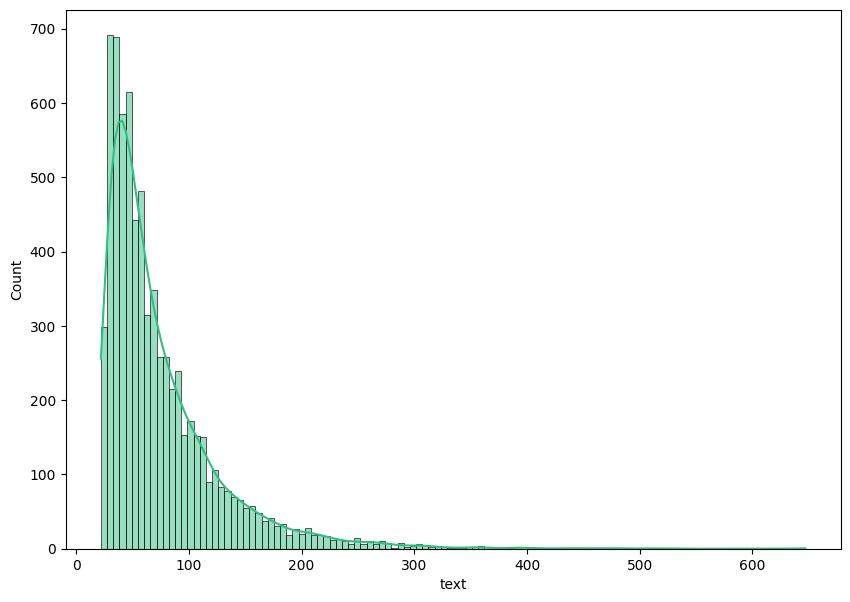

In [ ]:
# Length of the summaries made by the students
fig = plt.figure(figsize=[10,7])
sns.histplot(summary_word_count, color=sns.xkcd_rgb['greenish teal'], kde=True)
plt.show()

In [ ]:
summary_word_count.max()

647

In [ ]:
# Sorting the DataFrame based on the length of strings in the 'text' column
df_sorted = training_data.sort_values(by='text', key=lambda x: x.str.len(), ascending=False)
df_sorted.head()

,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
4765,3b9047,The base starts with farmers and slaves. The e...,3.021960,0.708060,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
5820,39c16e,"An ideal tragedy must have a relateable hero, ...",3.369991,3.897941,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \nAs the sequel to what has already...
6287,39c16e,Three elements of an ideal tragedy as describe...,2.807019,1.923362,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \nAs the sequel to what has already...
3701,3b9047,Ancient Egypt's system of government is differ...,3.160636,3.346665,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
3897,3b9047,The text says that the social structure works ...,1.959735,2.347619,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...


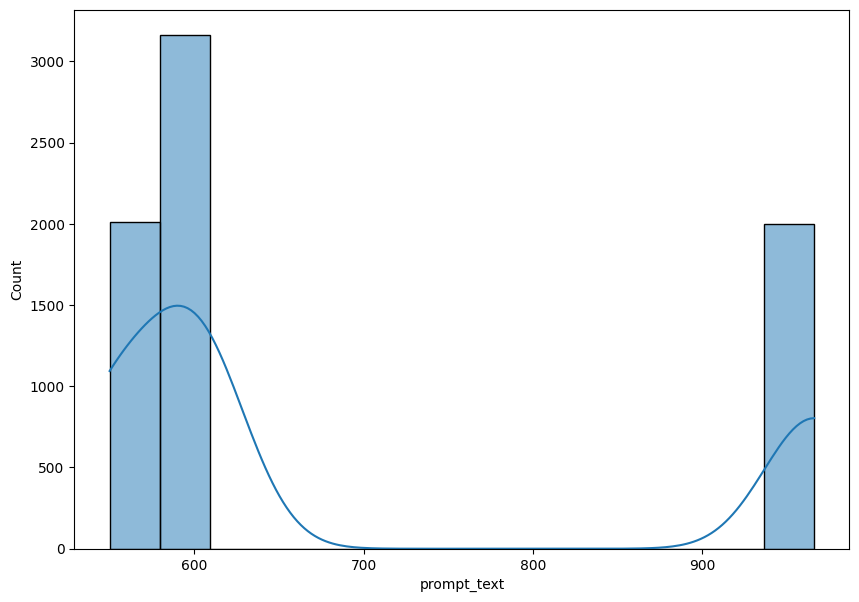

In [ ]:
# length of the full chapter
fig = plt.figure(figsize=[10,7])
sns.histplot(prompt_word_count, kde=True)
plt.show()

# Preprocessing dataset

In [ ]:
from spacy.lang.en import English
import string
import spacy

def preprocessText(text):
    try:
        # replace newline with space
        text = text.replace("\n", " ")
        # split text
        words = text.split()
        # convert to lowercase
        words = [word.lower() for word in words]
        # remove punctuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in words]
        # select only alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        # stop word removal
        stop_words = spacy.lang.en.stop_words.STOP_WORDS
        words = [w for w in words if not w in stop_words]
        # return pre-processed paragraph text
        text = ' '.join(words)
        return text
    except:
        return text

In [ ]:
string_columns = ["text","prompt_question","prompt_title","prompt_text"]

for col in string_columns:
  # apply preprocessText function to each text column in the dfTrain dataframe
  training_data[col] = training_data[col].apply(lambda x: preprocessText(x))

training_data.head()

,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,814d6b,wave experimentto people reacted new leader go...,0.205683,0.380538,summarize wave developed short period time exp...,wave,background wave experiment took place cubberle...
1,814d6b,wave developed rapidly students genuinly belie...,3.272894,3.219757,summarize wave developed short period time exp...,wave,background wave experiment took place cubberle...
2,814d6b,wave started experiment class slowly spread ki...,0.205683,0.380538,summarize wave developed short period time exp...,wave,background wave experiment took place cubberle...
3,814d6b,experimen orginally terrible thngs happening f...,0.567975,0.969062,summarize wave developed short period time exp...,wave,background wave experiment took place cubberle...
4,814d6b,wave developed quickly students particip thos ...,-0.910596,-0.081769,summarize wave developed short period time exp...,wave,background wave experiment took place cubberle...


In [ ]:
summary_word_count = training_data['text'].apply(lambda x: len(x.split()))
prompt_word_count = training_data['prompt_text'].apply(lambda x: len(x.split()))

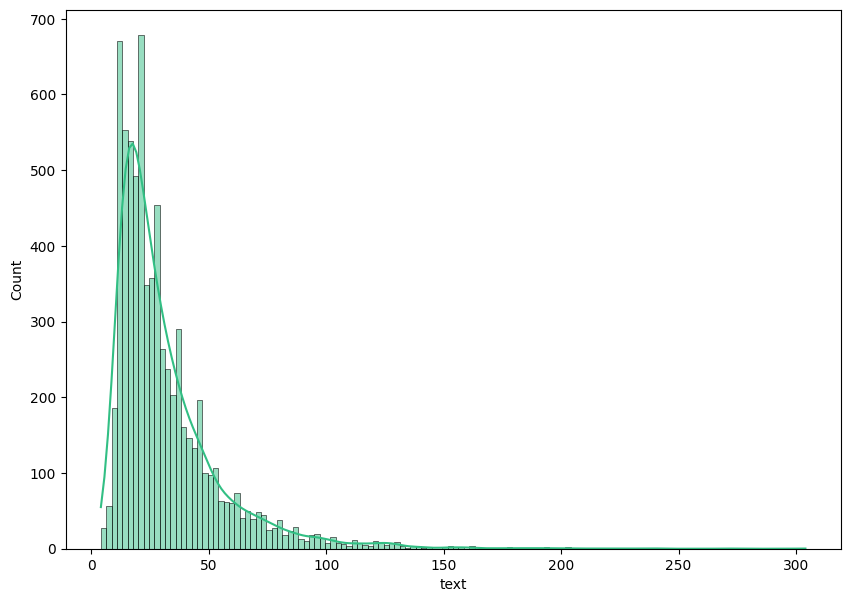

In [ ]:
# Length of the summaries made by the students
fig = plt.figure(figsize=[10,7])
sns.histplot(summary_word_count, color=sns.xkcd_rgb['greenish teal'], kde=True)
plt.show()

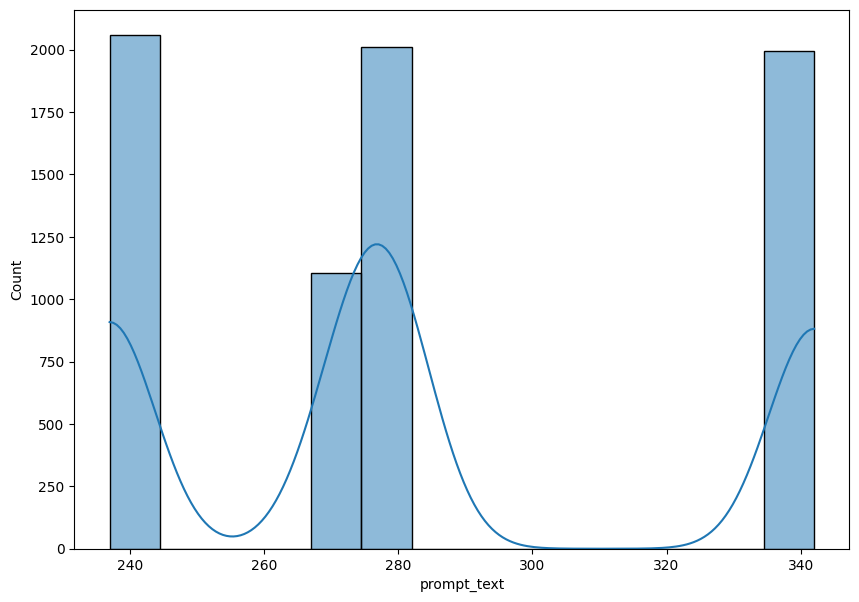

In [ ]:
fig = plt.figure(figsize=[10,7])
sns.histplot(prompt_word_count, kde=True)
plt.show()

In [ ]:
summary_word_count.max()

304

In [ ]:
prompt_word_count.max()

342

# PyTorch Dataset

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.3 MB/s eta 0:00:00


In [ ]:
from torch.utils.data import Dataset, DataLoader
from transformers import BertPreTrainedModel, BertModel
from transformers import AutoConfig, AutoTokenizer
import torch

class CommonLitDataset(Dataset):

    def __init__(self, data, maxlen, tokenizer, input_cols, target_cols):
        #Store the contents of the file in a pandas dataframe
        self.df = data.reset_index()
        #Initialize the tokenizer for the desired transformer model
        self.tokenizer = tokenizer
        #Maximum length of the tokens list to keep all the sequences of fixed size
        self.maxlen = maxlen
        #list of input columns
        self.input_cols = input_cols
        #list of target columns
        self.target_cols = target_cols

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, index):
        #Select the sentence and label at the specified index in the data frame
        input = self.df.loc[index, self.input_cols]

        try:
            target = self.df.loc[index, self.target_cols]
        except Exception as e:
           raise e

        #Preprocess the text to be suitable for the transformer
        tokens = self.tokenizer.tokenize(input)
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        if len(tokens) < self.maxlen:
            tokens = tokens + ['[PAD]' for _ in range(self.maxlen - len(tokens))]
        else:
            tokens = tokens[:self.maxlen-1] + ['[SEP]']

        #Obtain the indices of the tokens in the BERT Vocabulary
        input_ids = self.tokenizer.convert_tokens_to_ids(tokens)
        input_ids = torch.tensor(input_ids)
        #Obtain the attention mask i.e a tensor containing 1s for no padded tokens and 0s for padded ones
        attention_mask = (input_ids != 0).long()

        target = torch.tensor(target, dtype=torch.float32)

        return input_ids, attention_mask, target

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(training_data,  test_size=0.2)
train, validation = train_test_split(train,  test_size=0.2)

In [ ]:
print(train.shape, validation.shape, test.shape)

(4585, 7) (1147, 7) (1433, 7)


In [ ]:
## Model Configurations
MAX_LEN = summary_word_count.max()
MODEL_NAME = 'bert-base-uncased'
BATCH_SIZE = 32

## Configuration loaded from AutoConfig
config = AutoConfig.from_pretrained(MODEL_NAME)
## Tokenizer loaded from AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
input_cols="text"
target_cols=["content", "wording"]
train_set = CommonLitDataset(data=train, maxlen=MAX_LEN, tokenizer=tokenizer, input_cols=input_cols, target_cols=target_cols)
valid_set = CommonLitDataset(data=validation, maxlen=MAX_LEN, tokenizer=tokenizer, input_cols=input_cols, target_cols=target_cols)
test_set = CommonLitDataset(data=test, maxlen=MAX_LEN, tokenizer=tokenizer, input_cols=input_cols, target_cols=target_cols)

In [ ]:
train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE)
valid_loader = DataLoader(dataset=valid_set, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=test_set, batch_size=BATCH_SIZE)

print(len(train_loader))

144


In [ ]:
sample = next(iter(train_loader))
sample

[tensor([[  101,  4713, 24494,  ...,     0,     0,     0],
         [  101,  3787,  7812,  ...,     0,     0,     0],
         [  101,  3418,  6811,  ...,     0,     0,     0],
         ...,
         [  101,  1052, 12541,  ...,     0,     0,     0],
         [  101,  3252,  3418,  ...,     0,     0,     0],
         [  101,  3971,  4713,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([[ 0.1420, -0.2891],
         [ 0.6227,  0.0347],
         [-1.4082, -0.4936],
         [ 1.5518,  0.4934],
         [ 1.4564,  0.7083],
         [-0.5111, -1.5891],
         [ 1.4883,  2.2625],
         [ 1.5994,  2.0103],
         [ 1.9862,  1.0034],
         [-1.6385, -0.9120],
         [ 0.2057,  0.3805],
         [ 0.2057,  0.3805],
         [-1.4469, -0.4065],
         [-0.8036, -0.6683]

In [ ]:
# batch of sentences, all the sentences must be MAX_LEN length because they are padded
sample[0].shape

torch.Size([32, 304])

In [ ]:
# batch of attention masks
sample[1].shape

torch.Size([32, 304])

In [ ]:
sample[1]

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [ ]:
# target
sample[2].shape

torch.Size([32, 2])

# PyTorch Model

In [ ]:
from torch import nn


class RMSELoss(nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps

    def forward(self, yhat, y):
        loss = torch.sqrt(self.mse(yhat, y) + self.eps)
        return loss


class MCRMSELoss(nn.Module):
    def __init__(self, num_scored=2):
        super().__init__()
        self.rmse = RMSELoss()
        self.num_scored = num_scored

    def forward(self, yhat, y):
        score = 0
        for i in range(self.num_scored):
            score += self.rmse(yhat[:, i], y[:, i]) / self.num_scored

        return score

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class BertRegresser(BertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.bert = BertModel(config)
        #The output layer that takes the [CLS] representation and gives an output
        self.cls_layer1 = nn.Linear(config.hidden_size,128)
        self.relu1 = nn.ReLU()
        self.ff1 = nn.Linear(128,128)
        self.tanh1 = nn.Tanh()
        self.ff2 = nn.Linear(128,2)

    def forward(self, input_ids, attention_mask):
        #Feed the input to Bert model to obtain contextualized representations
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        #Obtain the representations of [CLS] heads
        logits = outputs.last_hidden_state[:,0,:]
        output = self.cls_layer1(logits)
        output = self.relu1(output)
        output = self.ff1(output)
        output = self.tanh1(output)
        output = self.ff2(output)
        return output

In [ ]:
def evaluate(model, criterion, dataloader, device):
    model.eval()
    mean_acc, mean_loss, count = 0, 0, 0

    with torch.no_grad():
        for input_ids, attention_mask, target in (dataloader):

            input_ids, attention_mask, target = input_ids.to(device), attention_mask.to(device), target.to(device)
            output = model(input_ids, attention_mask)

            mean_loss += criterion(output, target).item()
            #mean_loss += get_rmse(output, target.type_as(output)).item()
            count += 1

    return mean_loss/count

In [ ]:
from tqdm import tqdm, trange

def train(model, criterion, optimizer, train_loader, val_loader, epochs, device):
    best_acc = 0
    for epoch in trange(epochs, desc="Epoch"):
        model.train()
        train_loss = 0
        for i, (input_ids, attention_mask, target) in enumerate(iterable=train_loader):
            optimizer.zero_grad()

            input_ids, attention_mask, target = input_ids.to(device), attention_mask.to(device), target.to(device)

            output = model(input_ids=input_ids, attention_mask=attention_mask)

            loss = criterion(output, target.type_as(output))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        print(f"Training loss is {train_loss/len(train_loader)}")
        val_loss = evaluate(model=model, criterion = criterion, dataloader=val_loader, device=device)
        print("Epoch {} complete! Validation Loss : {}".format(epoch, val_loss))

In [ ]:
import gc
gc.collect()

4192

In [ ]:
LR = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
model = BertRegresser.from_pretrained(MODEL_NAME, config=config).to(device)
OPTIMIZER = optim.Adam(params=model.parameters(), lr=LR)
EPOCHS = 5
CRITERION = MCRMSELoss()
train(model=model,
      criterion=CRITERION,
      optimizer=OPTIMIZER,
      train_loader=train_loader,
      val_loader=valid_loader,
      epochs = EPOCHS,
     device = device)

Some weights of BertRegresser were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['ff2.bias', 'cls_layer1.bias', 'ff1.weight', 'cls_layer1.weight', 'ff2.weight', 'ff1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Training loss is 1.0329059486587842


Epoch:  20%|██        | 1/5 [04:05<16:22, 245.73s/it]

Epoch 0 complete! Validation Loss : 1.029148765736156
Training loss is 1.0313974279496405


Epoch:  40%|████      | 2/5 [08:10<12:15, 245.01s/it]

Epoch 1 complete! Validation Loss : 1.0237265295452542
Training loss is 1.0309447625444994


Epoch:  60%|██████    | 3/5 [12:12<08:07, 243.76s/it]

Epoch 2 complete! Validation Loss : 1.0238923562897577
Training loss is 1.0309492457244132


Epoch:  80%|████████  | 4/5 [16:14<04:03, 243.03s/it]

Epoch 3 complete! Validation Loss : 1.0238968829313915
Training loss is 1.0309372378720179


Epoch: 100%|██████████| 5/5 [20:16<00:00, 243.23s/it]

Epoch 4 complete! Validation Loss : 1.0238932851288054
